<a href="https://colab.research.google.com/github/Sawroyl/L6AI/blob/main/worksheet__6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<b>Worksheet-6 : <br ></b>Work with the FruitsInAnazon dataset and
 explore key deep learning techniques such as data augmentation, batch normalization, and dropout to
 enhance model performance. <br>
 <li>Understand Model Compilation and Training:
 <li>Evaluate and Test Model Performance:
 <li>Make Predictions and Interpret Results:

 <b>2. Building an End-to-End Image Classifier with CNNs. <br></b> Implement Image Classification from scratch, without using pre-trained
 weights or pre-built keras application models <li>data augmentation <li>batch normalization <li>dropout

<b>2.1 Data Understanding and Visualizations

In [1]:
# Verify Dataset
import os
# Dataset Path
train_dir = "/content/drive/MyDrive/AI And ML/FruitinAmazon/train"

# Get class names(sub-directories)
class_names = sorted(os.listdir(train_dir))
if not class_names:
  print("No class names directories found in the train folder.")
else:
  print(f"Found {len(class_names)} classes: {class_names}")


Found 6 classes: ['acai', 'cupuacu', 'graviola', 'guarana', 'pupunha', 'tucuma']


In [2]:
# Check for Corrupted Images
from PIL import Image, UnidentifiedImageError
# List to store corrupt image path
corrupt_images = []

# Loop through each class folder and check for corrupt images
for class_name in class_names:
  class_dir = os.path.join(train_dir, class_name)
  if os.path.isdir(class_dir): # Ensure if it's a valid directory
    images = os.listdir(class_dir)
    for img_name in os.listdir(class_dir):
      img_path = os.path.join(class_dir, img_name)
      try:
        with Image.open(img_path) as img:
          img.verify() # Verify image integrity
      except (UnidentifiedImageError, IOError):
        corrupt_images.append(img_path)
# Print results
if corrupt_images:
  print("\nCorrupt Image Found:")
  for img_path in corrupt_images:
    print(img_path)
else:
  print("\nNo corrupt images found.")



No corrupt images found.


In [3]:
# Count class Balance:
# so that no class should dominate the model

# Dictionary to store class counts
class_counts = {}

# Loop through each class folder and count images
for class_name in class_names:
  class_dir = os.path.join(train_dir, class_name)
  if os.path.isdir(class_dir):
    images = [img for img in os.listdir(class_dir) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
    class_counts[class_name] = len(images) # Count images in each class

# Print Class Balance
print("\nClass Distribution:")
print("=" * 45)
print(f"{'Class Name':<25}{'Valid Image Count':>15}")
print("=" * 45)
for class_name, count in class_counts.items():
  print(f"{class_name : <25}{count :> 15}")
print("=" * 45)



Class Distribution:
Class Name               Valid Image Count
acai                                  15
cupuacu                               15
graviola                              15
guarana                               15
pupunha                               15
tucuma                                15



*   Select Random Images for VIsualisation
-helps in verifying dataset is loaded correctly



In [4]:
# Random Image Selection
import random
selected_images = [] # Store image paths
selected_labels = [] # Store corresponding class names
for class_name in class_names:
  class_path = os.path.join(train_dir, class_name)
  images = [img for img in os.listdir(class_path) if img.lower().endswith(('.jpg', '.jpeg', '.png'))]
  if images: # Ensure the class folder is not empty
    selected_img = os.path.join(class_path, random.choice(images))
    selected_images.append(selected_img)
    selected_labels.append(class_name)

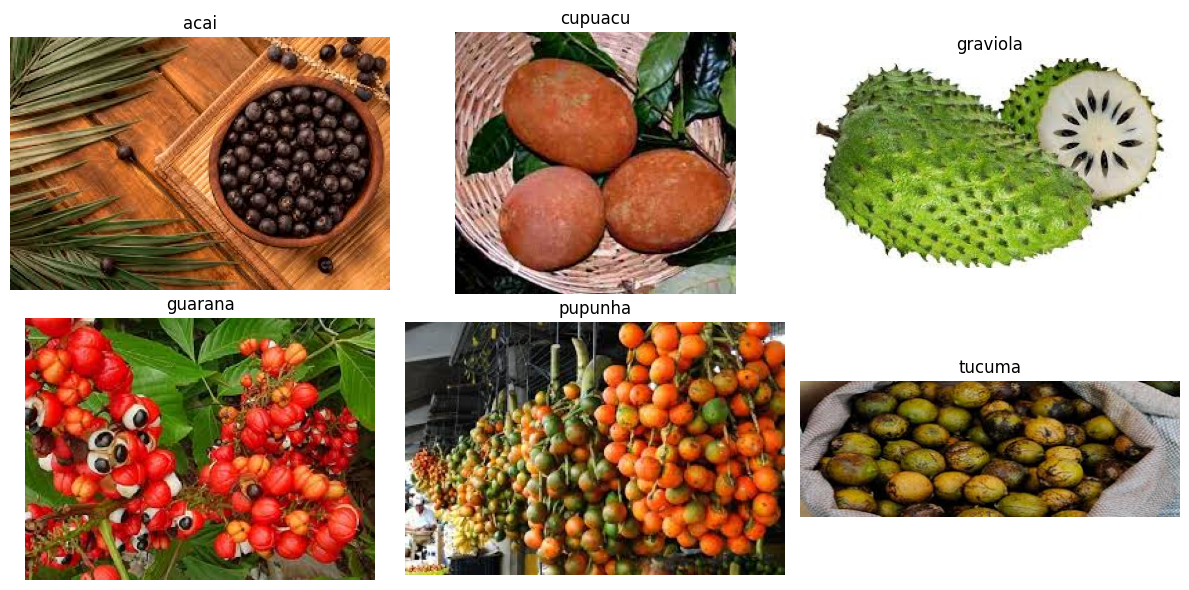

In [5]:
# Random Image Plot
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

# Determine grid size
num_classes = len(selected_images)
cols = (num_classes + 1) // 2 # Determine columns
rows = 2 # Fixed rows for layout
fig, axes = plt.subplots(rows, cols, figsize=(12, 6))
for i, ax in enumerate(axes.flat):
  if i < num_classes:
    img = mpimg.imread(selected_images[i])
    ax.imshow(img)
    ax.set_title(selected_labels[i])
    ax.axis('off')
  else:
    ax.axis('off') # Hide empty subplots
plt.tight_layout()
plt.show()

Proper dataset preparation ensures:


*   Data Integrity
*   Balanced Dataset
*   Correct Labeling





<b> 2.2 Data Generation and Pre - processing:

Generating the Train and Val Dataset

In [6]:
import keras
image_size = (28, 28)
batch_size = 32
train_ds, val_ds = keras.utils.image_dataset_from_directory(
  train_dir,
  validation_split=0.2,
  subset="both",
  seed=1337,
  image_size=image_size,
  batch_size=batch_size,
)

# Check the shape of a batch
for images, labels in train_ds.take(1): # Take one batch
  print("Images shape:", images.shape)
  print("Labels shape:", labels.shape)

Found 90 files belonging to 6 classes.
Using 72 files for training.
Using 18 files for validation.
Images shape: (32, 28, 28, 3)
Labels shape: (32,)


Visualize training dataset

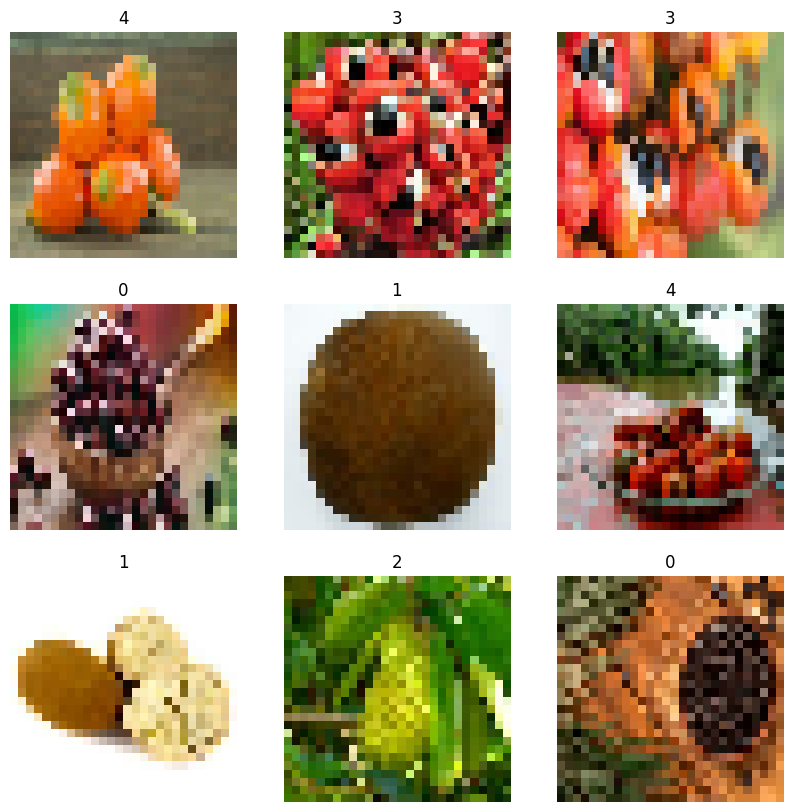

In [7]:
import numpy as np
plt.figure(figsize=(10, 10))
for images, labels in train_ds.take(1): #Takes one batch of images from the dataset (train_ds)
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(images[i]).astype("uint8"))
    plt.title(int(labels[i]))
    plt.axis("off")

Common techniques for Data Augmentations:
*   <b>Geometric Transformations: </b> Flipping, Rotation, Cropping, Scaling, Translation
*   <b>Color Transformations: </b> Brightness Adjustment, Contrast Change, Noise Addition, Adding random variations in pixel intensity
*   <b>Occlusion and Information Loss </b>: Cutout



<b>2. Data Augmentation with Keras: </b><br> Using Keras ImageDataGenerator (Old API):

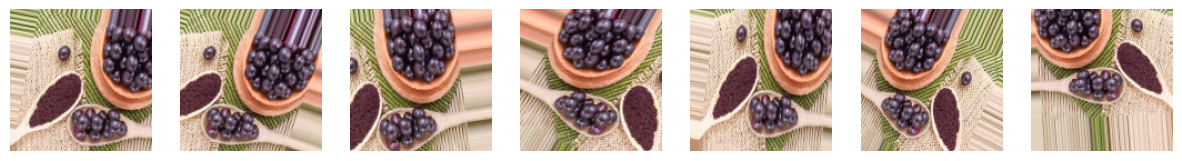

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
  rotation_range=30, # Rotate images by up to 30 degrees
  width_shift_range=0.2, # Shift width by 20%
  height_shift_range=0.2, # Shift height by 20%
  shear_range=0.2, # Shear transformation
  zoom_range=0.2, # Zoom in/out by 20%
  horizontal_flip=True, # Flip images horizontally
  fill_mode='nearest' # Fill in missing pixels
)

# Load an example image
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
img = image.load_img('/content/drive/MyDrive/AI And ML/FruitinAmazon/test/acai/download (9).jpeg', target_size=(128, 128))
x = image.img_to_array(img) # Convert to NumPy array
x = np.expand_dims(x, axis=0)
# Generate augmented images
aug_iter = datagen.flow(x, batch_size=1)
# Visualize 7 augmented images
fig, ax = plt.subplots(1, 7, figsize=(15, 5))
for i in range(7):
  batch = next(aug_iter)
  ax[i].imshow(batch[0].astype('uint8'))
  ax[i].axis('off')
plt.show()


Using Keras tf.keras.layers.Random* (New API):

In [10]:
import tensorflow as tf
from tensorflow.keras import layers
data_augmentation_layers = [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
]
def data_augmentation(images):
  for layer in data_augmentation_layers:
    images = layer(images)
  return images

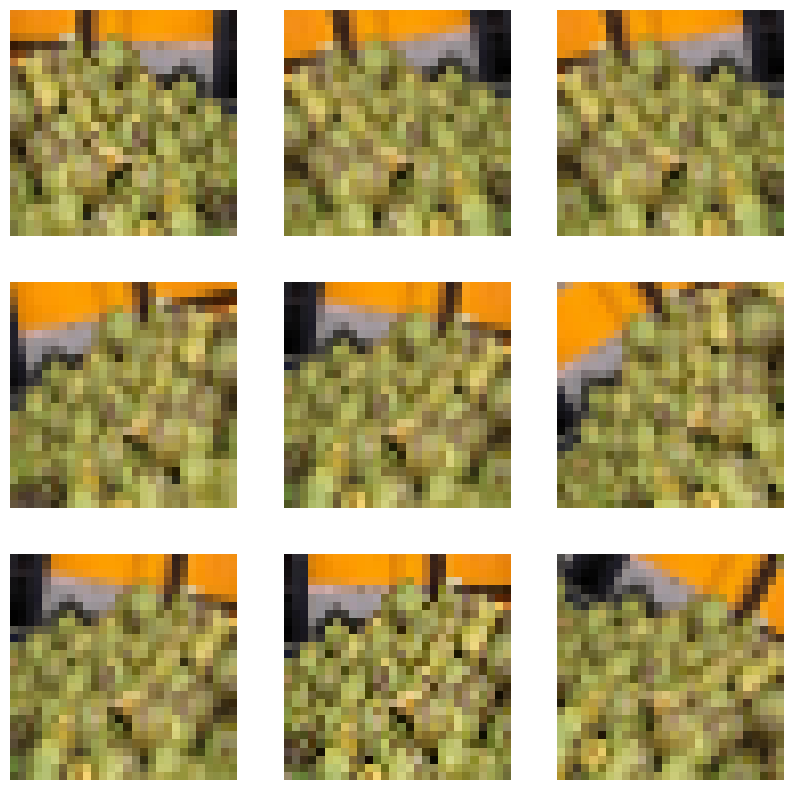

In [11]:
# Data Augmentation Layer directly in Model
model = keras.Sequential([
  layers.Input(shape=(128, 128, 3)),
  *data_augmentation_layers, # Include augmentation before the model layers
  # Rescaling layer to normalize pixel values
  layers.Rescaling(1./255),  # Normalize pixel values to [0, 1] by dividing by 255

  # Convolutional and other layers
  layers.Conv2D(32, (3,3), activation="relu"),
  layers.MaxPooling2D(),
  layers.Flatten(),
  layers.Dense(10, activation="softmax")
])

# Visualizing augemented Image
plt.figure(figsize=(10, 10))
for images, _ in train_ds.take(1):
  for i in range(9):
    augmented_images = data_augmentation(images)
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(np.array(augmented_images[0]).astype("uint8"))
    plt.axis("off")

Data Augmentation using ImageDataGenerator

<b>3. Data Pre - processing: Scaling the data with Keras: </b> <br>Standardize values to be in the [0, 1] by
using a Rescaling layer at the start of model


Option 1. Applying it to the dataset:

In [ ]:
augmented_train_ds = train_ds.map( lambda x, y: (data_augmentation(x, training=True), y))

Option 2. Make it part of the Model {Recommended Practice}:

In [ ]:
# Rescaling the part of Model
inputs = keras.Input(shape=input_shape)
x = data_augmentation(inputs)
x = layers.Rescaling(1./255)(x)

<b>2.3 Model Building: </b> <br>

In [12]:
# sample from last week
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import numpy as np
# Define a simple CNN model
model = keras.Sequential([
  layers.Conv2D(32, (3, 3), activation="relu", input_shape=(28, 28, 1)),
  layers.MaxPooling2D((2, 2)),
  layers.Conv2D(64, (3, 3), activation="relu"),
  layers.MaxPooling2D((2, 2)),
  layers.Flatten(),
  layers.Dense(128, activation="relu"),
  layers.Dense(10, activation="softmax") # 10 classes for MNIST digits
])
# Compile the model
model.compile(optimizer="adam",
  loss="sparse_categorical_crossentropy",
  metrics=["accuracy"])
# Train the model
model.fit(x_train, y_train, epochs=5, batch_size=32, validation_data=(x_test, y_test))
# Evaluate the model
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc:.4f}")
# Make predictions
predictions = model.predict(x_test[:5])
predicted_labels = np.argmax(predictions, axis=1)
print("Predicted labels:", predicted_labels)
print("Actual labels: ", y_test[:5])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


NameError: name 'x_train' is not defined

Batch Normalization Layer

1. Batch Normalization Class in Keras:

In [ ]:
# Syntax
from tensorflow.keras.layers import BatchNormalization
layer = BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True,
  beta_initializer="zeros", gamma_initializer="ones")

Dropout Layer in Keras:

In [ ]:
# Syntax
from tensorflow.keras.layers import Dropout
layer = Dropout(rate, noise_shape=None, seed=None)

2.3.1 Model Implemented with Batch Normalization and
Dropout Layer.

In [28]:
import tensorflow as tf
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, BatchNormalization, Activation, MaxPooling2D, Dropout, Flatten, Dense

data_augmentation_layers = [
  layers.RandomFlip("horizontal"),
  layers.RandomRotation(0.1),
]

def data_augmentation(images):
  for layer in data_augmentation_layers:
    images = layer(images)
  return images


# Define the model using the Sequential API with a list of layers
model = Sequential([
  # Data augmentation applied using Lambda layer
  layers.Lambda(data_augmentation, input_shape=(224, 224, 3)),

  # Rescaling layer to normalize pixel values
  layers.Rescaling(1./255),

  # First Convolutional Block
  Conv2D(32, (3, 3), padding='same', activation=None),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),

  # Second Convolutional Block
  Conv2D(64, (3, 3), padding='same', activation=None),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),

  # Third Convolutional Block
  Conv2D(128, (3, 3), padding='same', activation=None),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),

  # Fourth Convolutional Block
  Conv2D(256, (3, 3), padding='same', activation=None),
  BatchNormalization(),
  Activation('relu'),
  MaxPooling2D((2, 2)),
  Dropout(0.25),

  # Flatten the output of the last Conv2D layer
  Flatten(),

  # First Fully Connected Layer
  Dense(512, activation=None),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.5),

  # Second Fully Connected Layer
  Dense(256, activation=None),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.5),

  # Third Fully Connected Layer
  Dense(128, activation=None),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.5),

  # Fourth Fully Connected Layer
  Dense(64, activation=None),
  BatchNormalization(),
  Activation('relu'),
  Dropout(0.5),

  # Output Layer with 10 neurons (for classification task with 10 classes)
  Dense(10, activation='softmax')
])

# Compile the model with Adam optimizer, sparse categorical crossentropy loss, and accuracy as the metric
model.compile(optimizer='adam',
  loss='sparse_categorical_crossentropy', # Use this for integer labels
  metrics=['accuracy'])

# Summary of the model
model.summary()




Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lambda_1 (Lambda)                    │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ rescaling_2 (Rescaling)              │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 224, 224, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_8                │ (None, 224, 224, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_8 (Activation)            │ (None, 224, 224, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_8 (Dropout)                  │ (None, 112, 112, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 112, 112, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_9                │ (None, 112, 112, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_9 (Activation)            │ (None, 112, 112, 64)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_9 (Dropout)                  │ (None, 56, 56, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 56, 56, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_10               │ (None, 56, 56, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_10 (Activation)           │ (None, 56, 56, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_10 (Dropout)                 │ (None, 28, 28, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 28, 28, 256)         │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_11               │ (None, 28, 28, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼──────────────

 Total params: 26,257,930 (100.17 MB)

 Trainable params: 26,255,050 (100.16 MB)

 Non-trainable params: 2,880 (11.25 KB)

<b>3 Task - 1:</b>
<br>Repeat all the task from worksheet - 5 but, try to improve the model from last week with same dataset. <br>
• Use Data Augmentation to increase the number of training image.<br>
• Use deeper model with BN and DropOut layer as presented above.<br>
• Understand the Model Summary and Training Behavior.

In [21]:
import os
import random
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from pathlib import Path
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.layers import BatchNormalization, Dropout

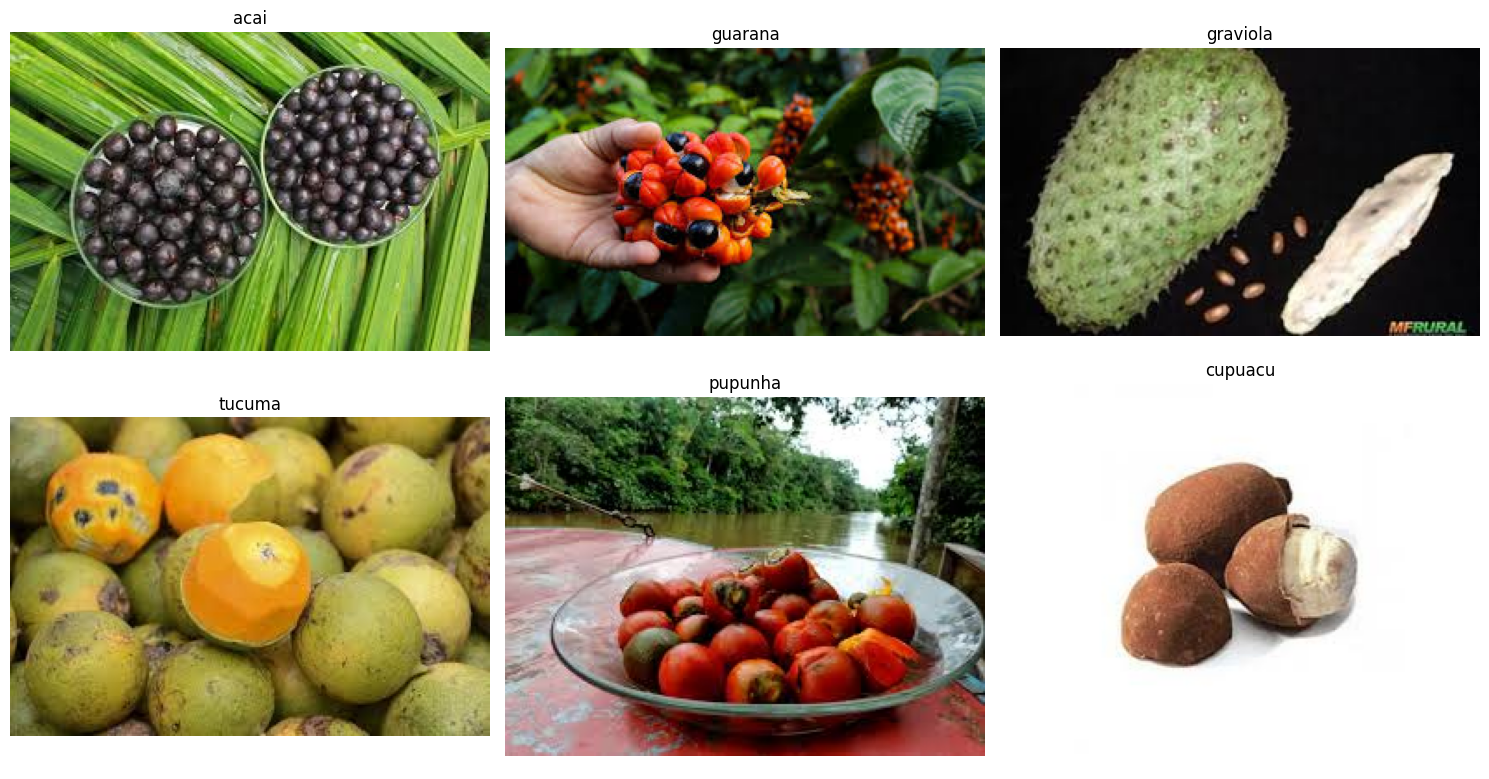

In [27]:
# Set the path to 'train' folder
train_folder = '/content/drive/MyDrive/AI And ML/FruitinAmazon/train'

# Get the list of class directories in the 'train' folder
class_dirs = [f.name for f in Path(train_folder).iterdir() if f.is_dir()]

# Select one image randomly from each class directory
images = []
for class_dir in class_dirs:
    class_folder = os.path.join(train_folder, class_dir)
    image_files = [f for f in os.listdir(class_folder) if f.endswith(('.png', '.jpg', '.jpeg'))]
    if image_files:
        random_image = random.choice(image_files)
        images.append(os.path.join(class_folder, random_image))


# Check the number of images selected
num_images = len(images)

# Plot images
num_columns = (num_images + 1) // 2
fig, axes = plt.subplots(2, num_columns, figsize=(15, 8))
axes = axes.flatten()
for i in range(num_images):
    img = mpimg.imread(images[i])
    axes[i].imshow(img)
    axes[i].axis('off')
    axes[i].set_title(class_dirs[i])
for i in range(num_images, len(axes)):
    axes[i].axis('off')
plt.tight_layout()
plt.show()

In [57]:
# Removing corrupt images
from PIL import Image

def remove_corrupt(dir):
    corrupted = []
    for root, dirs, files in os.walk(dir):
        for file in files:
            image_path = os.path.join(root, file)
            try:
                with Image.open(image_path) as img:
                    img.verify()
            except (IOError, SyntaxError) as e:
                os.remove(image_path)
                corrupted.append(image_path)
                print(f"Corrupted image removed: {image_path}")
    if not corrupted:
        print("No corrupted images found")

train_path = '/content/drive/MyDrive/AI And ML/FruitinAmazon/train'
remove_corrupt(train_path)

No corrupted images found


In [58]:
# Define image size and batch size
img_height = 128
img_width = 128
batch_size = 32
validation_split = 0.2

In [59]:
# Create training dataset with data augmentation and normalization
train_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=validation_split,
    subset='training',
    seed=123
)
class_names = train_ds.class_names


# Data augmentation
data_augmentation = tf.keras.Sequential([
    layers.RandomFlip('horizontal'),
    layers.RandomRotation(0.2),
    layers.RandomZoom(0.2),
])

Found 90 files belonging to 6 classes.
Using 72 files for training.


In [60]:


train_ds = train_ds.map(lambda x, y: (data_augmentation(x), y))  # Apply data augmentation
rescale = tf.keras.layers.Rescaling(1./255)
train_ds = train_ds.map(lambda x, y: (rescale(x), y))  # Normalize pixel values

# Create validation dataset with normalization
val_ds = image_dataset_from_directory(
    train_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    validation_split=validation_split,
    subset='validation',
    seed=123
)
val_ds = val_ds.map(lambda x, y: (rescale(x), y))  # Normalize pixel values

test_dir = '/content/drive/MyDrive/AI And ML/FruitinAmazon/test'
# Create test dataset with normalization
test_ds = image_dataset_from_directory(
    test_dir,
    labels='inferred',
    label_mode='int',
    image_size=(img_height, img_width),
    batch_size=batch_size,
    shuffle=False,
    seed=123
)
test_ds = test_ds.map(lambda x, y: (rescale(x), y))  # Normalize pixel values



Found 90 files belonging to 6 classes.
Using 18 files for validation.
Found 30 files belonging to 6 classes.


In [61]:
# Build the model with Batch Normalization and Dropout
model = tf.keras.Sequential([
    # Convolutional Layer 1
    layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(img_height, img_width, 3)),
    layers.BatchNormalization(),  # Batch Normalization
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 2
    layers.Conv2D(64, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),  # Batch Normalization
    layers.MaxPooling2D((2, 2)),

    # Convolutional Layer 3
    layers.Conv2D(128, (3, 3), padding='same', activation='relu'),
    layers.BatchNormalization(),  # Batch Normalization
    layers.MaxPooling2D((2, 2)),

    # Flatten the output
    layers.Flatten(),

    # Fully Connected Layer 1
    layers.Dense(128, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization

    # Fully Connected Layer 2
    layers.Dense(64, activation='relu'),
    layers.Dropout(0.5),  # Dropout for regularization

    # Output Layer
    layers.Dense(num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_7"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_6 (Conv2D)                    │ (None, 128, 128, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 128, 128, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 64, 64, 32)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 64, 64, 64)          │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_4                │ (None, 64, 64, 64)          │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 32, 32, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_5                │ (None, 32, 32, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 32768)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 128)                 │       4,194,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_4 (Dropout)                  │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 6)                   │             390 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 4,297,222 (16.39 MB)

 Trainable params: 4,296,774 (16.39 MB)

 Non-trainable params: 448 (1.75 KB)

In [62]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [63]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    batch_size=batch_size
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.1970 - loss: 6.2395 - val_accuracy: 0.0556 - val_loss: 1.9254
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 2s/step - accuracy: 0.2391 - loss: 8.4954 - val_accuracy: 0.0556 - val_loss: 1.9811
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 9s 1s/step - accuracy: 0.2973 - loss: 7.3006 - val_accuracy: 0.0556 - val_loss: 2.3323
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 8s 2s/step - accuracy: 0.3750 - loss: 6.3232 - val_accuracy: 0.0556 - val_loss: 2.6270
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2765 - loss: 7.8381 - val_accuracy: 0.0556 - val_loss: 2.4011
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 5s 1s/step - accuracy: 0.2904 - loss: 7.4356 - val_accuracy: 0.0556 - val_loss: 2.0511
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 6s 1s/step - accuracy: 0.4045 - loss: 5.4275 - val_accuracy: 0.0000e+00 - val_loss: 2.0697
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 4s 1s/step - accuracy: 0.2470 - loss: 7.9759 - val_accuracy: 0.0556 - val_loss: 2.0033
Epoch 9/10
3

In [64]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 458ms/step - accuracy: 0.2667 - loss: 3.4324
Test Loss: 3.4324259757995605
Test Accuracy: 0.2666666805744171


In [65]:
# Save the trained model
model.save('fruit_classification_model_v2.h5')
print("Model saved as 'fruit_classification_model_v2.h5'")

# Load and evaluate the saved model
from tensorflow.keras.models import load_model
loaded_model = load_model('fruit_classification_model_v2.h5')
print("Model loaded from 'fruit_classification_model_v2.h5'")

# Evaluate the loaded model
test_loss, test_acc = loaded_model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

Model saved as 'fruit_classification_model_v2.h5'


Model loaded from 'fruit_classification_model_v2.h5'
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step - accuracy: 0.2667 - loss: 3.4324
Test Loss: 3.4324259757995605
Test Accuracy: 0.2666666805744171


<b>4 Image classification via fine-tuning with VGG16


<b> Transfer Learning </b> <br>1. Load the Pre - trained Model:

In [66]:
from tensorflow.keras.applications import VGG16
# Load the VGG16 model pre-trained on ImageNet, without the top classification layer
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

2. Freeze the Layers:

In [ ]:
# Freeze the layers of the base model
for layer in base_model.layers:
  layer.trainable = False


3. Add a Custom Layers:


In [ ]:
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
# Add custom layers on top of the pre-trained model
x = base_model.output
x = GlobalAveragePooling2D()(x) # Reduces dimensions (height, width) to a single vector per image
x = Dense(1024, activation='relu')(x) # Fully connected layer with 1024 neurons
x = Dense(10, activation='softmax')(x) # Output layer for 10 classes (with softmax for multi-class classification)


4. Create the Final Model:

In [ ]:
from tensorflow.keras.models import Model
# Create the final model
model = Model(inputs=base_model.input, outputs=x)

5. Compile and Fit the model.


In [ ]:
from tensorflow.keras.optimizers import Adam
# Compile the model
model.compile(optimizer=Adam(), loss=’categorical_crossentropy’, metrics=[’accuracy’])
# model.fit( #......)


<b>5 Task - 2:<br>To - Do:


• Implement transfer learning using a pre-trained model trained on ImageNet weights, freeze the
layers of the model, and fit it only on the output layer to classify the fruits dataset. <br>
• Evaluate the model's performance and generate an inference output and classification report.<br>
• Did the performance improved compared to training from scratch

In [67]:
import tensorflow as tf
from tensorflow.keras.applications import VGG16
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from sklearn.metrics import classification_report
import numpy as np

In [75]:
# Load VGG16 pre-trained model without the top (classification) layers
base_model = VGG16(weights='imagenet', include_top=False, input_shape=(img_height, img_width, 3))

# Freeze the layers of the base model to prevent updating during training
for layer in base_model.layers:
  layer.trainable = False

In [77]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
# Add custom layers on top of the base model
model = Sequential()
model.add(base_model)
model.add(Flatten())
model.add(Dense(1024, activation='relu'))
model.add(Dense(10, activation='softmax'))

#model = tf.keras.Sequential([
#   base_model,  # Pre-trained model as a base
#  layers.GlobalAveragePooling2D(),
# layers.Dense(128, activation='relu'),
#layers.Dropout(0.5),  # Dropout for regularization
#layers.Dense(num_classes, activation='softmax')
#])

model.summary()

Model: "sequential_9"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ vgg16 (Functional)                   │ (None, 4, 4, 512)           │      14,714,688 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_4 (Flatten)                  │ (None, 8192)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_13 (Dense)                     │ (None, 1024)                │       8,389,632 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_14 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 23,114,570 (88.18 MB)

 Trainable params: 8,399,882 (32.04 MB)

 Non-trainable params: 14,714,688 (56.13 MB)

In [78]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [79]:
# Train the model
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    #batch_size=batch_size
)

Epoch 1/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 23s 7s/step - accuracy: 0.0799 - loss: 4.4399 - val_accuracy: 0.2778 - val_loss: 7.7027
Epoch 2/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 19s 6s/step - accuracy: 0.2669 - loss: 5.5692 - val_accuracy: 0.4444 - val_loss: 5.2806
Epoch 3/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 21s 6s/step - accuracy: 0.4314 - loss: 4.2027 - val_accuracy: 0.2778 - val_loss: 5.3149
Epoch 4/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 39s 5s/step - accuracy: 0.5838 - loss: 2.5280 - val_accuracy: 0.5556 - val_loss: 2.0719
Epoch 5/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.6359 - loss: 1.2604 - val_accuracy: 0.6667 - val_loss: 1.4256
Epoch 6/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 7s/step - accuracy: 0.7331 - loss: 0.8000 - val_accuracy: 0.5556 - val_loss: 1.3543
Epoch 7/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 18s 6s/step - accuracy: 0.8672 - loss: 0.3306 - val_accuracy: 0.5556 - val_loss: 1.3019
Epoch 8/10
3/3 ━━━━━━━━━━━━━━━━━━━━ 20s 6s/step - accuracy: 0.8511 - loss: 0.4549 - val_accuracy: 0.5556 - val_loss: 1.4940
Epoch 9/

In [80]:
# Evaluate the model on the test dataset
test_loss, test_acc = model.evaluate(test_ds)
print(f"Test Loss: {test_loss}")
print(f"Test Accuracy: {test_acc}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 6s 6s/step - accuracy: 0.4000 - loss: 1.7619
Test Loss: 1.7619062662124634
Test Accuracy: 0.4000000059604645


In [81]:
# Predict on the validation dataset
y_pred = []
y_true = []

# Loop over the validation dataset and make predictions
for images, labels in val_ds:
    predictions = model.predict(images)
    y_pred.extend(np.argmax(predictions, axis=1))  # Get predicted class labels
    y_true.extend(labels.numpy())  # Get true class labels

1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


In [82]:
# Generate a classification report
from sklearn.metrics import classification_report

# Print the classification report
print("\nClassification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))



Classification Report:
              precision    recall  f1-score   support

        acai       0.00      0.00      0.00         1
     cupuacu       0.67      1.00      0.80         2
    graviola       1.00      0.67      0.80         3
     guarana       1.00      0.40      0.57         5
     pupunha       0.57      1.00      0.73         4
      tucuma       0.67      0.67      0.67         3

    accuracy                           0.67        18
   macro avg       0.65      0.62      0.59        18
weighted avg       0.76      0.67      0.65        18

